<a href="https://colab.research.google.com/github/eormeno12/Curso_de_Fundamentos_Matematicos_para_Inteligencia_Artificial/blob/main/4_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los algoritmos son una serie de pasos o proceso que se le da al computador para que este haga una tarea determinada.

#Tipos de Algoritmos

---

##Supervisados

---

####Regresión Lineal

---


Como su nombre lo dice, se trata de una regresión, busca convertir los puntos dispersos en una "ley", una línea, una función. Esto lo logra mediante la aplicación del **error cuadrático.** (valor esperado - valor real)

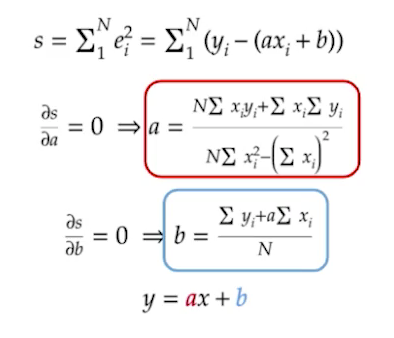

Lo que se hace es que aplicamos derivadas parciales a función del error cuadrático hacia "a" y "b". Una vez aplicadas las derivadas parciales igualadas a 0, obtendremos un sistema de equaciones que resuelto nos dará los nuevos valores de "a" y "b", estos valores definirán una nueva función la cual permitirá la regresión.

##No supervisados

---

###Clasificación
---

Se encarga de predecir etiquetas de clase categóricas de un grupo de instancias a partir de observaciones pasadas.

**Tipos de clasificación**:
* Clasificación binaria -> Solo dos clases.
  * Ejemplo: Clasificador de spam o no.
* Clasificación multiclase -> Varias clases. (+2)
  * Ejemplo: Reconocimiento de caracteres.

**Clasificación de valores**:
* Valores linealmente separables -> los valores pueden separarse sin complicaciones por una línea para la clasificación.
* Valores linealmente inseparables -> los valores impiden que se puedan separar de un manera sencilla con la ayuda de una línea para la clasificación.
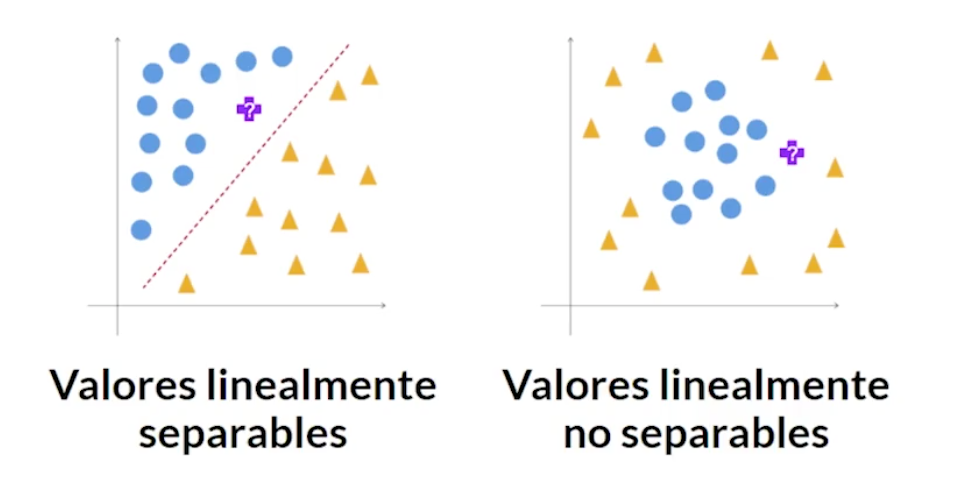

De acuerdo a la complejidad de la distribución de los datos, es mejor elegir un algoritmo de clasificación que otro.

**Ejemplos de algoritmos de clasificación**:
* Regresión logística.
* Support vector machines.
* Árboles y bosques.
* KNN.

####Regresión Logística

---

 La regresión logística busca separar los valores brindándoles otro valor de acuerdo a la función sigmoide que varia entre 0 y 1. Por lo tanto si un valor devuelve menos de 0.5 pertenecerá a una clase y si devuelve más de 0.5 pertenecerá a otra clase.
 

**La función logit**. 

Esta función genera una correlación entre los datos mediante el uso de los logaritmos, la inversa a esta función es la función **sigmoide**

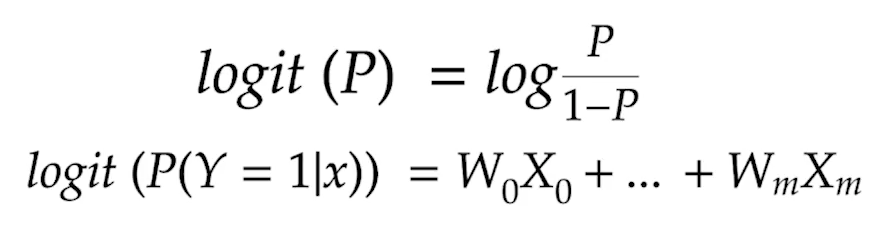

* logit se puede traducir como el logaritmo de la probabilidad de que algo ocurra entre la probabilidad que no ocurra.
* logit(P(Y = 1|x)) es el equivalante a una combinación lineal entre los pesos y la variable x.

**La función sigmoide**

La función sigmoide es la inversa a logit, ya que en esta se aplica la exponencial (e) y no logaritmos.

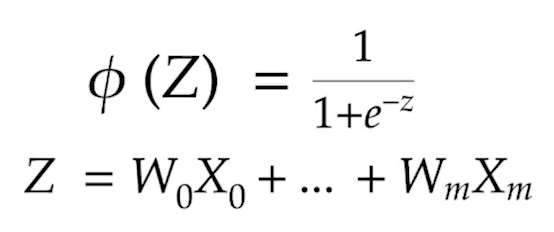

* Z **es igual a decir** logit(P(Y = 1|x))

La función sigmoide coge un input de datos y los posiciona entre 0 y 1. Esta entrada de datos puede ser de -infinito a +infinito.

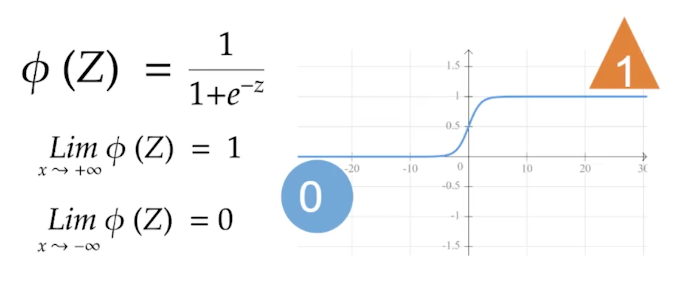

**Ejemplo con código**:

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1, 1)
y = np.array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]]).reshape(-1, 1)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
training_x = np.array([1, 1.5, 2, 2.5, 3, 3.5]).reshape(-1, 1)
prediction = log_reg.predict(training_x)
prediction_proba = log_reg.predict_proba(training_x)
print(prediction)
print(prediction_proba)

[0 0 0 0 1 1]
[[0.87984046 0.12015954]
 [0.80480773 0.19519227]
 [0.69895285 0.30104715]
 [0.56660539 0.43339461]
 [0.42402118 0.57597882]
 [0.29305565 0.70694435]]


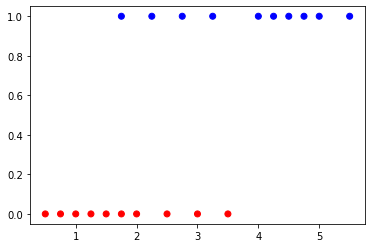

In [ ]:
colors_scatter_set = []
for i in y:
  if i == 0:
    colors_scatter_set.append("red")
  else:
    colors_scatter_set.append("blue")

plt.scatter(x, y, color=colors_scatter_set)

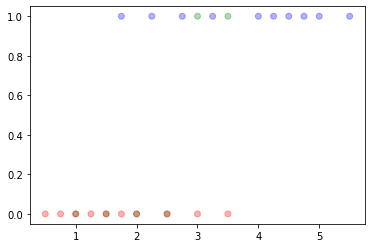

In [ ]:
colors_scatter_pre = []
for i in prediction:
  colors_scatter_pre.append("green")

colors_total = np.append(colors_scatter_pre, colors_scatter_set)
plot.scatter(np.append(training_x, x), np.append(prediction, y), color=colors_total, alpha=0.3)
  

####Support Vectors Machines

---

Consiste en separar la nube de puntos del input en clases. Lo que el support vector machines mapear la región y dividirla en zonas.

**Representación gráfica**:

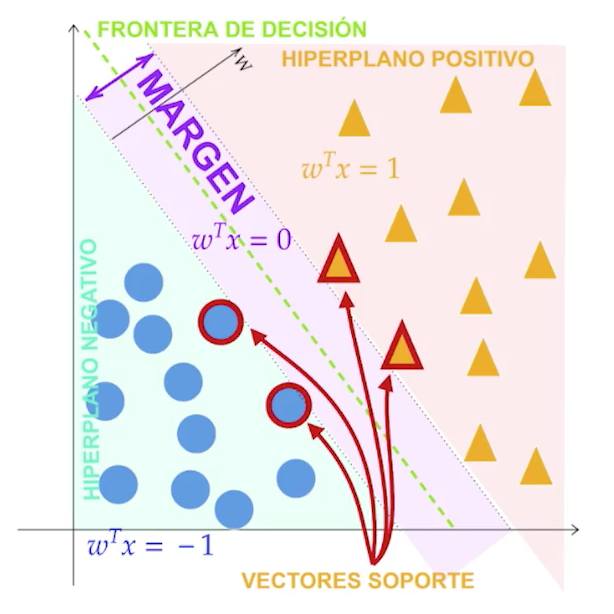

En la imagen se puede apreciar como se genera una frontera de decisión (una línea) de la cual surge un margen que se podría considerar "tierra de nadie". La frontera de decisión determina la clase de un punto pasada esta frontera.

**Como determinar el margen**

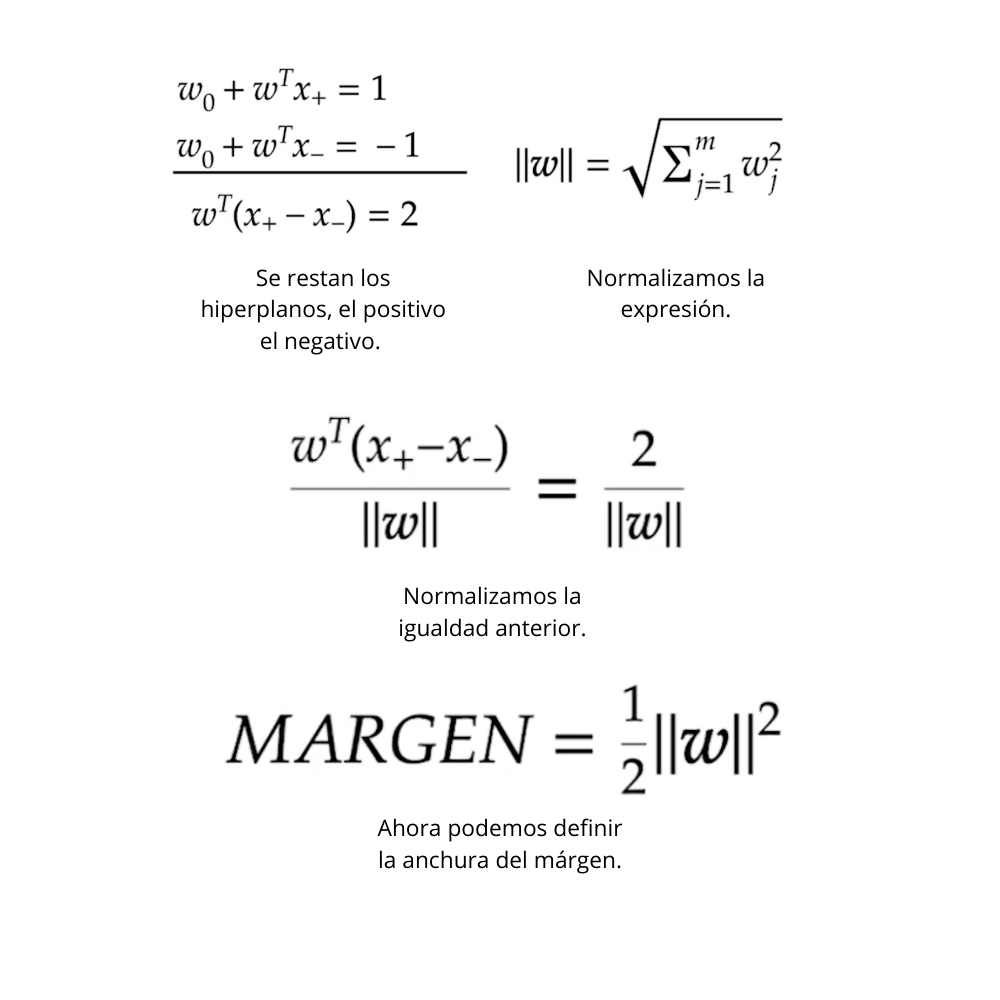

**Coeficiente de error**

Necesitamos la anchura para poder determinar que tan complejo va a ser la separación de las clases. A la anchura del márgen se le añadir un error, el coeficiente C (función variable débil). El error determina si el márgen se vuelve más ancho o más estrecho.

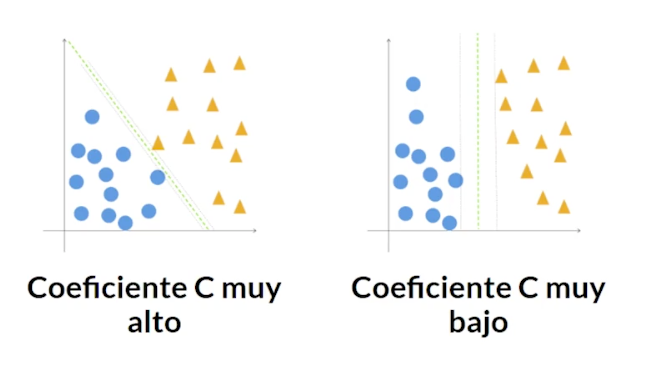

Si el coeficiente de C:
* **Es muy alto** -> el márgen es más estrecho y por ende es más complicado separar las clases.
* **Es muy bajo** -> el márgen es más ancho y por es ende es más sencillo separar las clases.

**¿Qué sucede si los puntos no son linelamente separables?**

**La kernelización**

Esto se basa en establecer una manera de separar los datos, pero no limita en dimensiones, se puede hacer en 3 o incluso 4 dimensiones. La kernelización es una manera más eficiente y menos costosa de transformar los datos a una dimensión superior.

**Tipos de kermelización**:

Existen varios tipos de kermelización debido a que cuando aplicamos el kernel, el modelo se adapta, por lo tanto tenemos que encontrar cual es la mejor opción para nuestro modelo.

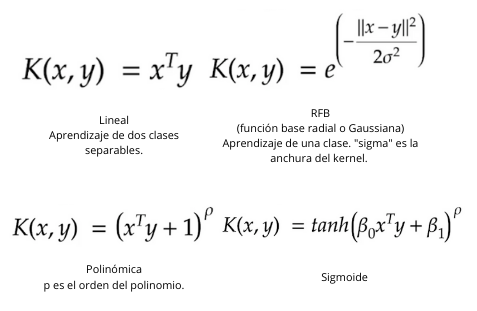

**Ejemplo en código**

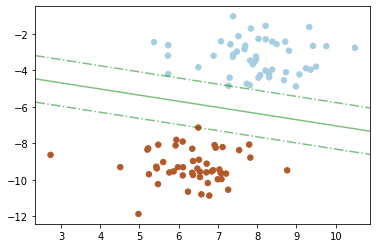

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

#  Aquí se divide en hiperplanos nuestros datos
#  en este caso son 2 hiperplanos (centers es igual a 2)
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

#  clf es clasiffier
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
#  Scatter establece la dispersión de los datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#  Aquí se establecieron los ejes "x" , "y"
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#  Aquí se establecieron los límites y escalas
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
#  Se define la malla de datos para que esten ordenados
YY, XX = np.meshgrid(yy, xx)
#  Se distribuyen los datos en la malla
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#  Aquí está la función de decisión
Z = clf.decision_function(xy).reshape(XX.shape)

#  Esto lo hace más estético
ax.contour(XX, YY, Z, colors='g', levels=[-1, 0, 1], alpha=0.5, linestyles=['-.', '-', '-.'])
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100, linewidth=1, facecolors='none')
#  Nos muestra la gráfica
plt.show()

####Árboles de decisión

---

**Revisar el documento de matmáticas avanzadas - Árboles I**

Los árboles se pueden dividir en dos tipos:
* Árboles de clasificación (este es el que veremos) -> Utiliza minado de datos, clases, modas, etc.
* Árboles de regresión -> Utiliza estadística, número, media, etc.


**Random Forest** (Bosque aleatorios)

Los bosques conjugan varios árboles para llegar a una conclusión final. Si los árboles individualmente devuelven cierto output común, es determinado como el output final.

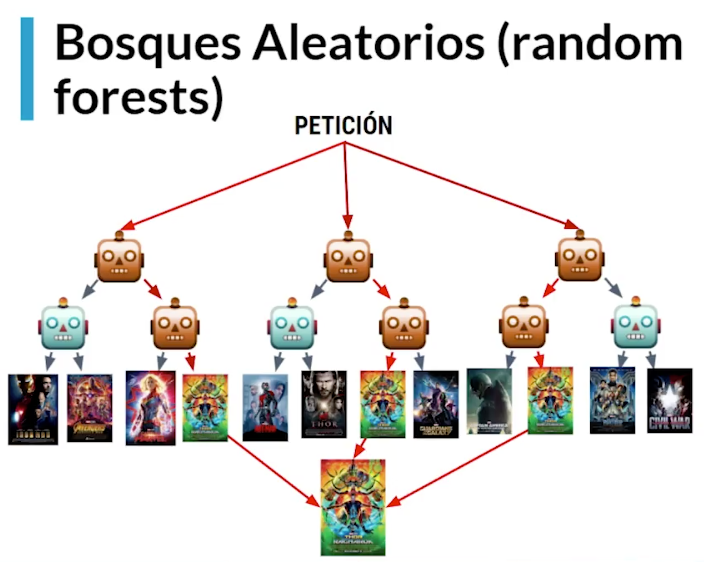

####KNN (K nearest neighbours)

---

Este algoritmo se le denomina como "perezoso" ya que solo evalúa los datos cercanos de acuerdo al k, no evalua el set completo, no crea un modelo.

Dentro de una nube de puntos, el KNN comienza a evaluar la distancia del input con todos los otros puntos y determina los puntos k más cercanos.

1. Escoger entre el número de k y la distancia.
2. Encuentra el k-vecino más cercano de la muestra.
3. Asigna la etiqueta de clase por votación mayoritaria.

Cercanía muchas veces no signifca igualdad de clase.
Además este algoritmo es muy lento cuando se trata de numerosidad de puntos.

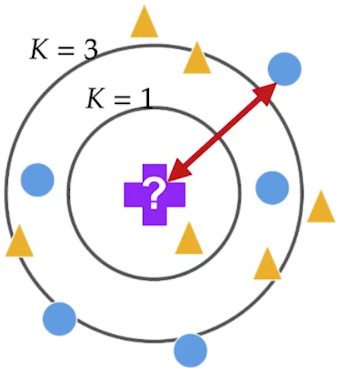

####Clustering 

----

El K-means se compone de 3 etapas:

* Inicialización: se elige la localización de los centroides de los K grupos aleatoriamente
* Asignación: se asigna cada dato al centroide más cercano
* Actualización: se actualiza la posición del centroide a la media aritmética de las posiciones de los datos asignados al grupo

Los pasos 2 y 3 se siguen iterativamente hasta que no haya más cambios.

####Aprendizaje de dependencias

---

**Teorema de Bayes**

Teorema que podemos enconctrar en clases pasadas. Brinda la probabilidad de que ocurran hechos dependientes.

**Reglas de asociación**

Imaginemos que somos parte del equipo de marketing de una empresa y estmos estudiando 5 productos (leche, pan, mantequilla y cerveza). Nosotros notamos que cuando un cliente compra pan y leche tiende a comprar mantequilla por lo tanto podemos concluir dos variables...

* Soporte -> es la frecuencia realativa de una reglas sobre el total de transacciones. Tenemos que contar en cuantas trasacciones están presentes las combinación de pan, leche y mantequilla, posteriormente dividirla entre el total de transacciones.
  * En este caso sería: 2/5 = 0.4
* Confianza -> mide que tan confiable es la suposición hecha por la regla. Nos da la probabilidad que se compre un item Y dado que se compró un item X. De las transacciones que compraron X, cuantas compraron Y.
  * En este caso sería (supocisión): 0.2 / 0.4 = 0.5 

**Fórmulas:**

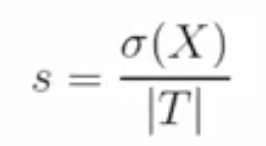

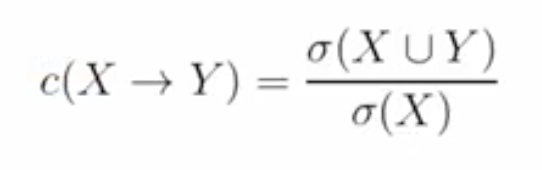

####Programación lógica inductiva

La programación lógica inductiva es la intersección entre el aprendizaje automático y la lógica. Se busca que las computadora cree normas a partir de datos lógicos.

**Ejemplo para que la computafora reconozca que es una hija**:

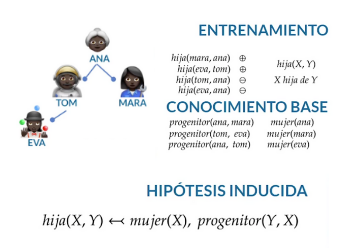

####Optimización II

---

Consiste en maximizar o minimizar una función.

**Algoritmo Genético**:

Este algoritmo representa como funciona la población humana o animal. En este algoritmo tenemos una población de la cual debemos seleccionar quienes son los más aptos para ser padres. Este es un ciclo, en el cual los hijos van a pertenecer a la población y en el futuro reemplazar a algún individuo repitiendo el proceso hasta que toda la población sea apta.

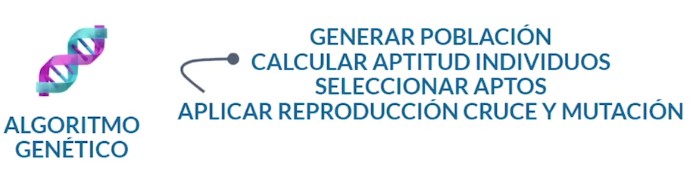

**Ejemplos en código**:

In [ ]:
import random

n_poblacion = 10
genes = 10
prob_mutacion = 0.2
candidatos_a_padres = 4
modelo = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


class Individuo():
    def crear_individuo(self, max, min):
        return [random.randint(max, min) for _ in range(genes)]


class Poblacion():

    def crear_poblacion(self, cantidad):
        return [Individuo().crear_individuo(1, 9) for _ in range(cantidad)]


def aptitud_del_individuo(individuo):
    aptitud = 0

    for i in range(len(individuo)):
        if individuo[i] == modelo[i]:
            aptitud += 1

    return aptitud


def seleccion_y_reproduccion(poblacion):
    lista_aptitudes = [(aptitud_del_individuo(i), i) for i in poblacion]
    lista_aptitudes_ordenada = [i[1] for i in sorted(lista_aptitudes)]

    poblacion = lista_aptitudes_ordenada
    individuos_aptos = lista_aptitudes_ordenada[len(poblacion) - candidatos_a_padres:]

    for i in range(len(poblacion) - candidatos_a_padres):
        padres = random.sample(individuos_aptos, 2)
        punto_medio = random.randint(0, 10)

        poblacion[i][punto_medio:] = padres[0][punto_medio:]
        poblacion[i][:punto_medio] = padres[1][:punto_medio]

    return poblacion


def mutacion(poblacion):
    for i in range(n_poblacion - candidatos_a_padres):
        if random.random() <= prob_mutacion:
            punto_a_cambiar = random.randint(0, 9)
            punto_cambiado = random.randint(0, 10)

            while poblacion[i][punto_a_cambiar] == punto_cambiado:
                punto_cambiado = random.randint(0, 10)

            poblacion[i][punto_a_cambiar] = punto_cambiado
    return poblacion


if __name__ == '__main__':
    poblacion = Poblacion().crear_poblacion(n_poblacion)
    print(f"Población incial: {poblacion}")

    for _ in range(1000):
        poblacion = seleccion_y_reproduccion(poblacion)
        poblacion = mutacion(poblacion)

    print(f"Poblacion final: {poblacion}")


Población incial: [[5, 5, 2, 1, 3, 8, 7, 5, 8, 8], [9, 6, 9, 9, 4, 3, 7, 6, 9, 5], [9, 1, 2, 2, 2, 1, 5, 1, 9, 2], [4, 4, 7, 4, 3, 8, 4, 1, 2, 8], [2, 4, 3, 9, 8, 5, 2, 5, 2, 2], [7, 1, 3, 2, 3, 1, 7, 9, 1, 4], [8, 5, 1, 8, 2, 6, 1, 3, 6, 8], [6, 6, 4, 4, 2, 5, 8, 7, 2, 8], [3, 1, 5, 2, 1, 1, 2, 4, 2, 2], [3, 4, 9, 6, 6, 4, 6, 5, 1, 3]]
Poblacion final: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


 **Algoritmo Ant Colony**

 Nos ponemos en el caso que somos una hormiga que quiere moverse por su colonia, nosotros como hormiga tenemos que encontrar el camino más corto para poder recolectar la mayor cantidad de ferormonas. Necesitamos tener en cuenta dos factores para movernos la economía de energía y maximizar las ferormonas.


Todo se basa en la probabilidad de que la hormiga se mueva de una posición X a Y.

**Para la probabilidad precisamos de:**

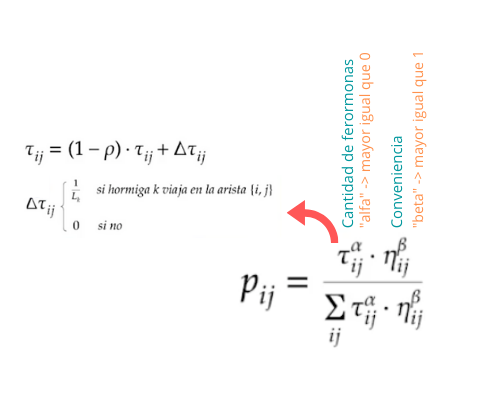

##Por refuerzo

---

Se premia o se castiga al algoritmo de acuerdo a sus acciones.

####Q-Learning

---


**Q representa la CALIDAD**

Q es una función:

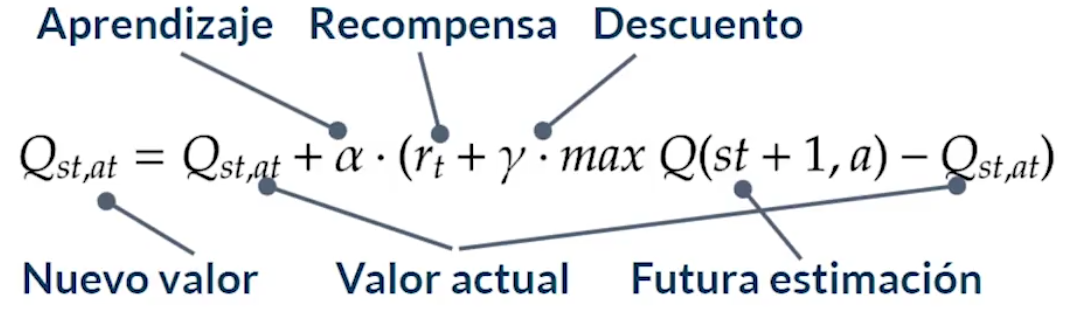

* Podemos jugar con las variables para que la calidad sea mayor o menor.

* La función aplica recursividad por lo tanto se va actualizando conforme vaya creciendo la calidad.

**Código:**

In [ ]:
import numpy as np
import random

In [ ]:
#Iniciar desde cero los valores de la tabla Q
Q = np.zeros((states_size, action_size))

#Establecer el porcentaje a explorar
epsilon = 0.2

In [ ]:
if random.uniform(0, 1) < epsilon:
  #Explora: Selección de una acción aleatoria
else:
  #Eplora: Selección de una acción de valor máximo (recompensa)

In [ ]:
#Actualización de los valores de Q
Q[state, action] = Q[state, action] + lr * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

##Deep Learning

---

###Redes Neuronales

Las redes neuronales intentan replicar el funcionamiento de las neuronas orgánicas mediante al implementación de algoritmos.

**Funcionamiento**



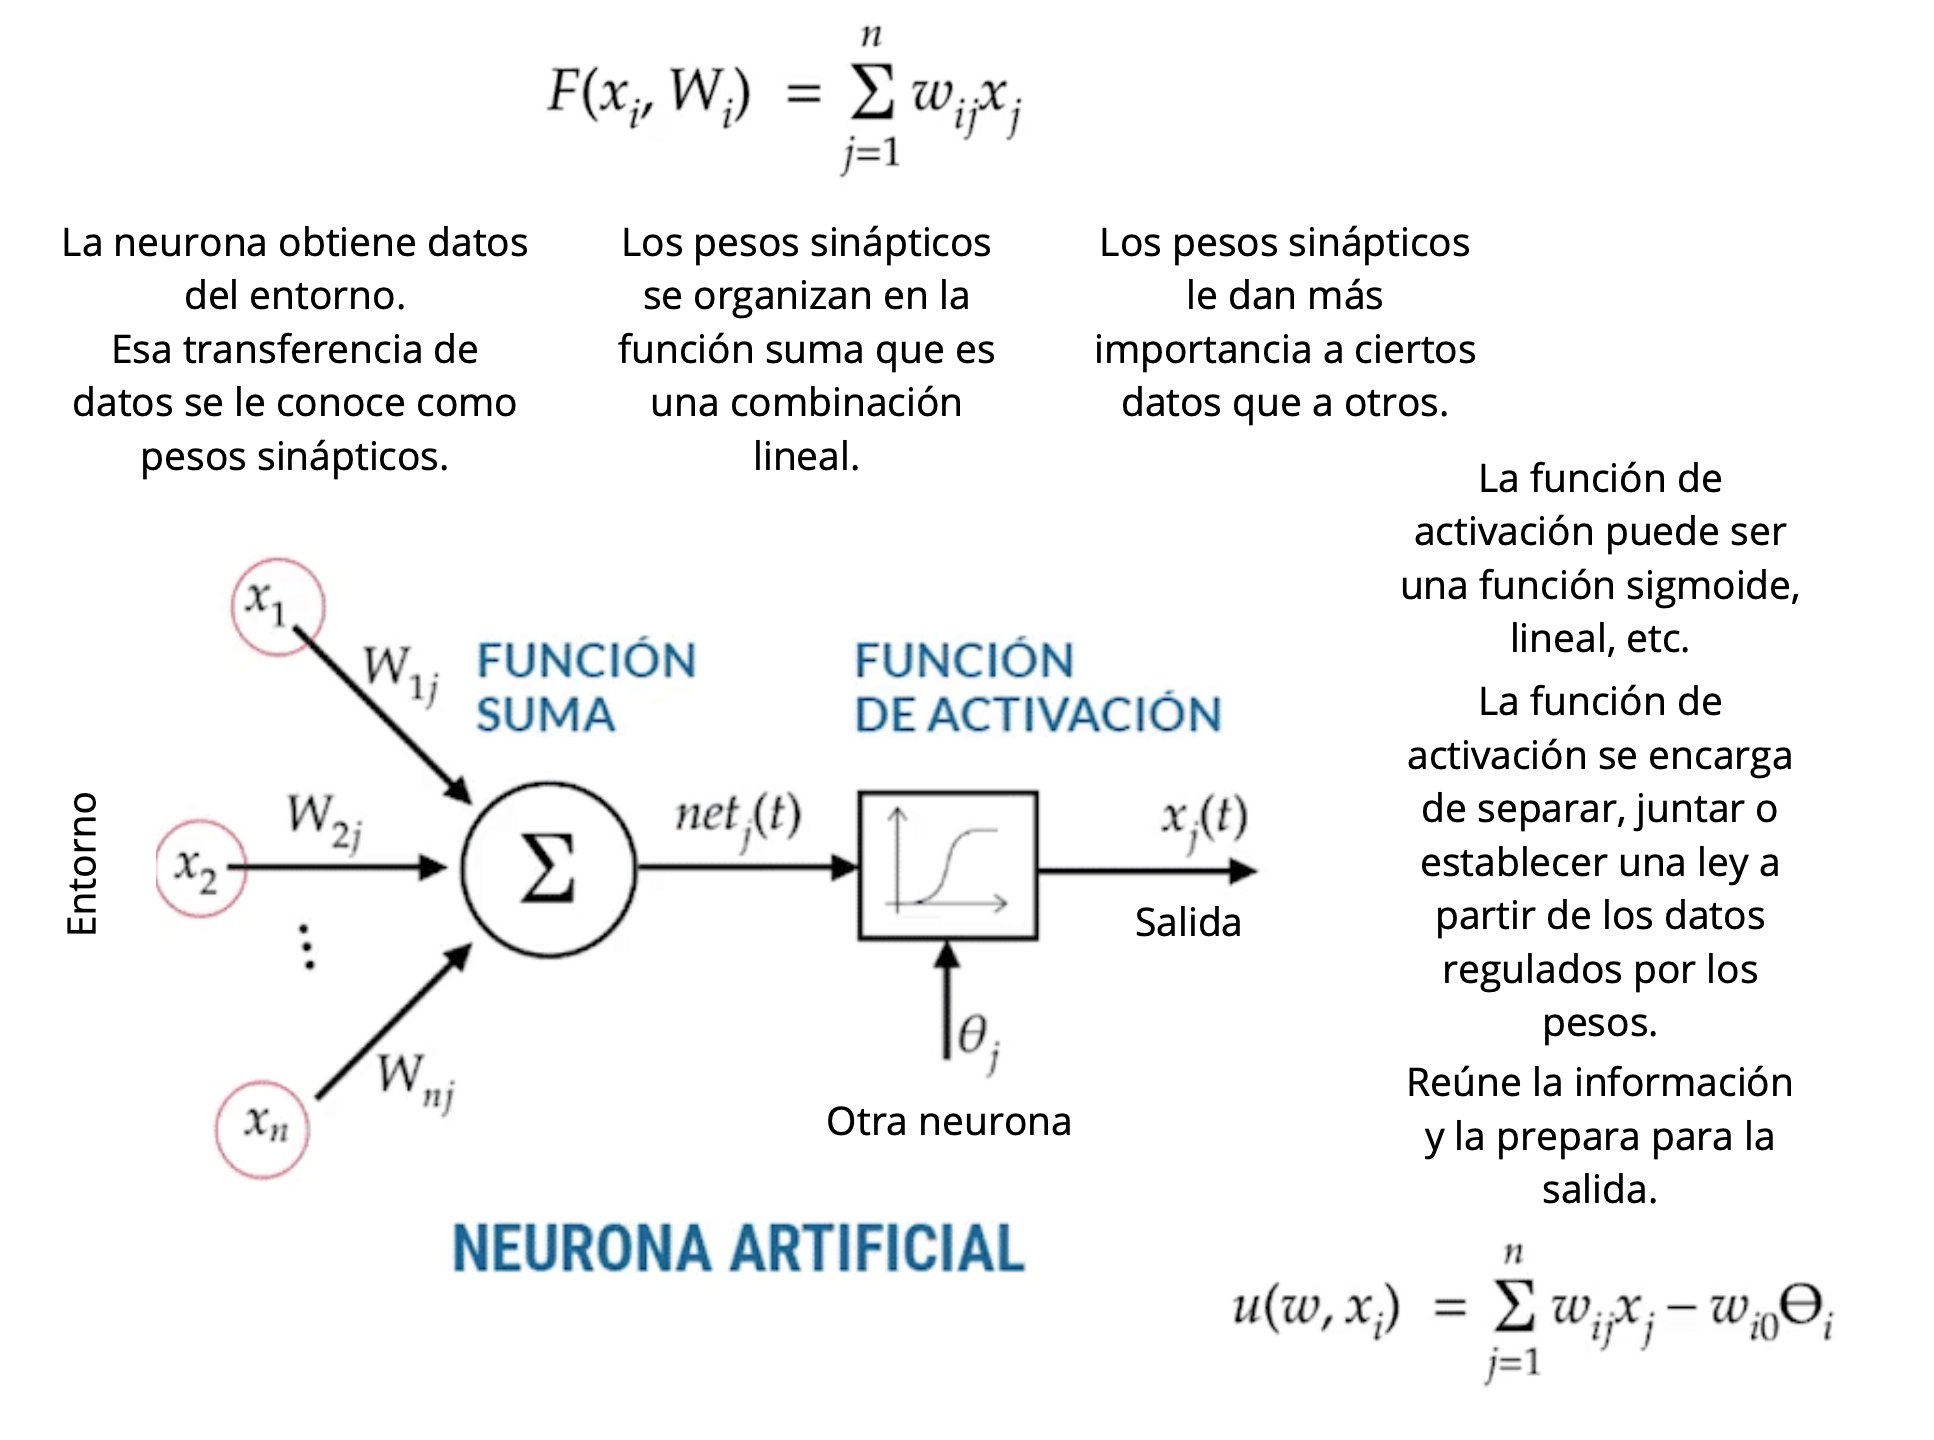

Las redes neuronales son la combinación de varias neuronas en disitntas capas conectadas a través de la función de activación. Es sentido de esta neuronas es unidireccional y en algunas ocasiones recursivo.